In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 15,10

In [3]:
df = pd.read_csv('tmdb-movies.csv')

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
df.size

228186

In [6]:
df.shape

(10866, 21)

In [7]:
df = df.dropna(subset = ['imdb_id'])

As the number of null values in the imdb_id is really less when compared to the size of the dataset, we can drop those particular rows.

In [8]:
df.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7922
director                  40
tagline                 2817
keywords                1487
overview                   3
runtime                    0
genres                    21
production_companies    1025
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
null_not_accepted = ['homepage', 'cast', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies' ]
for column in null_not_accepted:
    df[column] = df[column].replace(np.NaN, 0)

In [10]:
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [11]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.013764,-0.141057,-0.099006,-0.086601,-0.035197,-0.060096,0.511274,-0.188766,-0.138310
popularity,-0.013764,1.000000,0.545400,0.663329,0.138859,0.800817,0.210300,0.090136,0.513465,0.609042
budget,-0.141057,0.545400,1.000000,0.734867,0.191093,0.632651,0.081687,0.116297,0.968957,0.622450
revenue,-0.099006,0.663329,0.734867,1.000000,0.162735,0.791152,0.173169,0.057299,0.706390,0.919101
runtime,-0.086601,0.138859,0.191093,0.162735,1.000000,0.163175,0.158363,-0.116535,0.220936,0.175579
vote_count,-0.035197,0.800817,0.632651,0.791152,0.163175,1.000000,0.254533,0.108222,0.586991,0.707908
vote_average,-0.060096,0.210300,0.081687,0.173169,0.158363,0.254533,1.000000,-0.118707,0.093775,0.193732
release_year,0.511274,0.090136,0.116297,0.057299,-0.116535,0.108222,-0.118707,1.000000,0.017148,-0.066036
budget_adj,-0.188766,0.513465,0.968957,0.706390,0.220936,0.586991,0.093775,0.017148,1.000000,0.646556
revenue_adj,-0.138310,0.609042,0.622450,0.919101,0.175579,0.707908,0.193732,-0.066036,0.646556,1.000000


In [10]:
x = df.groupby(by='release_year')['runtime'].mean()
print(x)

release_year
1960    110.656250
1961    119.419355
1962    124.343750
1963    111.323529
1964    109.214286
1965    118.171429
1966    106.891304
1967    104.950000
1968    107.282051
1969    106.580645
1970    112.048780
1971    107.727273
1972    101.950000
1973    103.527273
1974    105.617021
1975    107.363636
1976    109.319149
1977    107.105263
1978    110.076923
1979    112.017544
1980    107.500000
1981    105.865854
1982    103.925926
1983    103.000000
1984    103.466667
1985    114.339450
1986     99.933884
1987    101.168000
1988    101.793103
1989    104.781022
1990    105.651515
1991    105.112782
1992    107.030075
1993    107.123596
1994    106.913043
1995    107.548571
1996    105.705882
1997    106.505208
1998    105.061905
1999    108.861607
2000    103.779736
2001    108.033058
2002    106.864662
2003    100.679715
2004    105.364821
2005    102.686813
2006    101.683824
2007    100.504587
2008    100.280242
2009     98.271186
2010     97.987730
2011     97.922222

Q4) What is the average runtime of movies in the year 2000? 

#### From the above data, it is very clear that the average runtime of movies in the year 2000 is 103.78.

In [12]:
df['Profit'] = df['revenue']-df['budget']

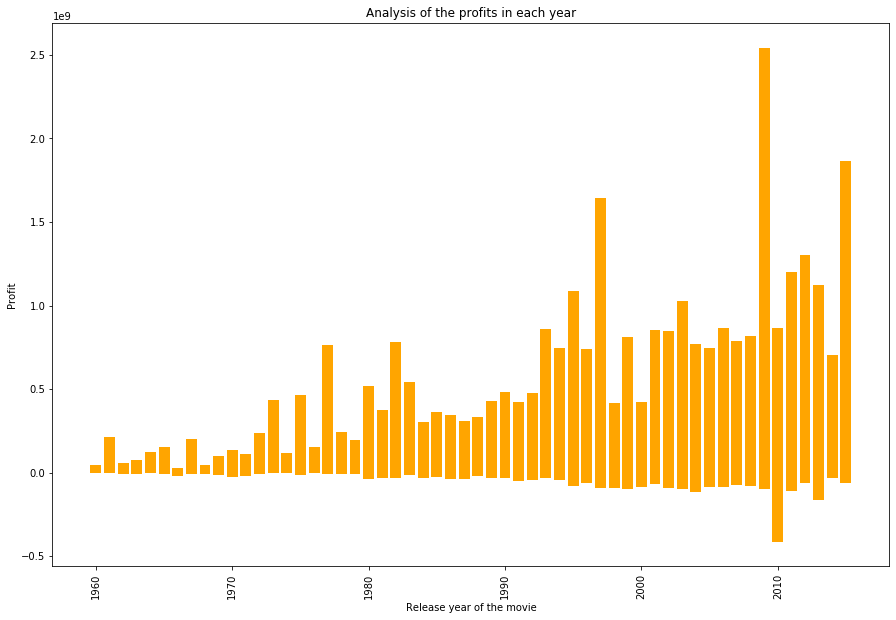

In [13]:
plt.bar("release_year", "Profit", data = df, color = "orange")
plt.xlabel("Release year of the movie")
plt.ylabel("Profit")
plt.xticks(rotation = 90)
plt.title("Analysis of the profits in each year")
plt.show()

In [14]:
df.groupby(by = 'release_year')['Profit'].max()

release_year
1960      48000000
1961     211880014
1962      58500000
1963      76398765
1964     121400000
1965     155014286
1966      26236689
1967     201843612
1968      44715371
1969      96308889
1970     134200000
1971     108800000
1972     239066411
1973     433306145
1974     116900000
1975     463654000
1976     155000000
1977     764398007
1978     245218018
1979     193182160
1980     520400000
1981     371925971
1982     782410554
1983     540350000
1984     305000000
1985     362109762
1986     341830601
1987     306145693
1988     329825435
1989     426171806
1990     483000000
1991     420000000
1992     476050219
1993     857100000
1994     743241776
1995    1084279658
1996     741969268
1997    1645034188
1998     413799566
1999     809317558
2000     421388105
2001     851475550
2002     847287400
2003    1024888979
2004     769838758
2005     745921036
2006     865659812
2007     788212738
2008     816921825
2009    2544505847
2010     863171911
2011    1202817822

##### From the above data, it is clearly evident that the maximum profit made between 2000 - 2005 is 1024888979 in the year 2003

In [15]:
df[(df.Profit == 1024888979)]
#Obtaining the movie name which made the highest profit between 2000 and 2005

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Profit
4949,122,tt0167260,7.122455,94000000,1118888979,The Lord of the Rings: The Return of the King,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,http://www.lordoftherings.net,Peter Jackson,The eye of the enemy is moving.,...,201,Adventure|Fantasy|Action,WingNut Films|New Line Cinema,12/1/03,5636,7.9,2003,1.114231e+08,1.326278e+09,1024888979


Q1) Which movie had the most profit during 2000-2005?

#### From the above analysis we can conclude that "THE LORD OF RINGS: THE RETURN OF THE KING" had the most profit during 2000-2005. It was released in 2003. 